In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import read_csv

### Helper Functions

In [2]:
def prediction_plot(data, title, save = False, save_at = 'prediction_plot', vmin = None, vmax = None):
    """
    Display a prediction plot with optional saving.

    Args:
    data (np.ndarray): Input data to be displayed as an image.
    title (str): Title for the plot.
    save (bool, optional): Whether to save the plot as an image file. Default is False.
    save_at (str, optional): File name to use when saving the plot. Only applicable if save is True. Default is 'prediction_plot'.
    vmin (float, optional): Minimum value for color mapping. Default is None.
    vmax (float, optional): Maximum value for color mapping. Default is None.

    Returns:
    None
    """
    
    plt.imshow(data, origin = 'lower', vmin = vmin, vmax = vmax, interpolation = 'none')
    plt.title(title)
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('$LST_0+[min]$')
    clb = plt.colorbar()
    clb.ax.set_title('$[Jy]/\sigma$')
    if save:
        plt.savefig(save_at)
    plt.show()
    plt.close()

In [87]:
def learning_plot(logs, title, start = 0, end = None):
    """
    Plot the learning curve from training and validation logs.

    Args:
    logs (str): Path to the CSV file containing training and validation logs.
    title (str): Title for the plot.
    start (int, optional): Index of the epoch to start plotting from. Default is 0.
    end (int, optional): Index of the epoch to end plotting at. Default is None, which plots until the last epoch.

    Returns:
    None
    """
    
    data = read_csv(logs)

    # converting column data to list
    loss = data['loss'].tolist()[1:]
    val_loss = data['val_loss'].tolist()
    
    if end == 0:
        end = len(loss)
    
    plt.plot(val_loss[start:end], label = "Validation loss")
    plt.plot(loss[start:end], label = "Training loss")
    plt.xlabel('Epoch', fontsize = 15)
    plt.ylabel('Learning curve', fontsize = 15)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.close()

In [3]:
 def error_histogram(ground_truths, predictions, masks, error_type, title, save = False, save_at='error_histogram'):
    """
    Plot a histogram of errors between ground truth and predictions.

    Args:
    ground_truths (np.ndarray): Ground truth data.
    predictions (np.ndarray): Predicted data.
    masks (np.ndarray): Binary masks indicating valid data points.
    error_type (str): Type of error calculation. Use 'ABSOLUTE' or 'RESIDUAL'.
    title (str): Title for the plot.
    save (bool, optional): Whether to save the plot as an image file. Default is False.
    save_at (str, optional): File name to use when saving the plot. Only applicable if save is True. Default is 'error_histogram'.

    Returns:
    None
    """
    
    groundtruth_masks = ground_truths[masks[:,:,:] == 1] 
    predictions_masks = predictions[masks[:,:,:] == 1] 

    if error_type == 'ABSOLUTE':
        error = np.abs(groundtruth_masks - predictions_masks)
    elif error_type == 'RESIDUAL':
        error = np.true_divide((groundtruth_masks - predictions_masks), groundtruth_masks)
    else:
        raise ValueError("Invalid error_type. Use 'ABSOLUTE' or 'RESIDUAL'.")    

    plt.hist(error.flatten(), bins=100, range=(0,10))
    plt.xlabel("Magnitude")
    plt.ylabel("Count")
    plt.title(title)
    if save:
        plt.savefig(save_at)
    plt.show()
    plt.close()

In [96]:
def residual_plot(data, title = None, save = False, save_at='residual_plot', vmin=-1, vmax=1):
    """
    Plot a residual error heatmap.

    Args:
    data (np.ndarray): Residual error data to be displayed as a heatmap.
    title (str, optional): Title for the plot. Default is None.
    save (bool, optional): Whether to save the plot as an image file. Default is False.
    save_at (str, optional): File name to use when saving the plot. Only applicable if save is True. Default is 'residual_plot'.
    vmin (float, optional): Minimum value for color mapping. Default is -1.
    vmax (float, optional): Maximum value for color mapping. Default is 1.

    Returns:
    None
    """
    
    plt.imshow(data, origin='lower', vmin=vmin, vmax=vmax, interpolation='none', cmap='bwr')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('$LST_0+[min]$')

    clb = plt.colorbar(label='Residual Error')
    if title:
        plt.title(title)
    if save:
        plt.savefig(save_at)
    plt.show()
    plt.close()

In [4]:
def normalize(data):
    """
    Normalize the input data by subtracting the mean and dividing by the standard deviation.

    Args:
    data (np.ndarray): Input data to be normalized.

    Returns:
    np.ndarray: Normalized data.
    float: Mean of the original data.
    float: Standard deviation of the original data.
    """
    
    mean = np.mean(data)
    std = np.std(data)
    normalized_data = (data - mean) / std
    return normalized_data, mean, std

### Loading Data

In [7]:
data = np.load("../outputs/upaint_data_out_dss.npz")
predictions = data["predictions"]
ground_truths = data["ground_truths"]
masks = data["masks"]

reconstructed = reconstruct(ground_truths[:,:,:,0], masks[:,:,:], predictions[:,:,:,0])

### Predictions and Learning

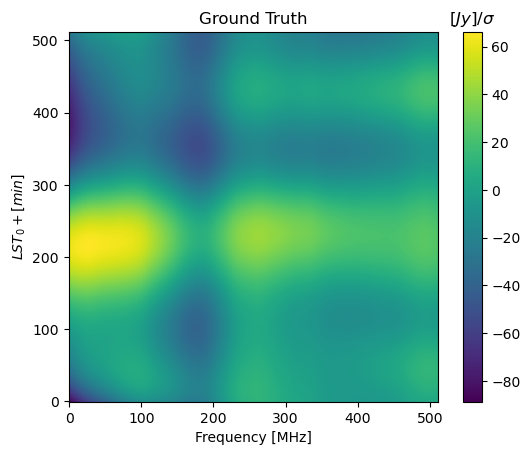

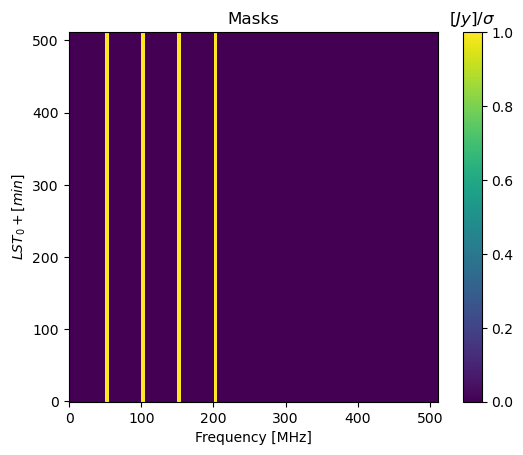

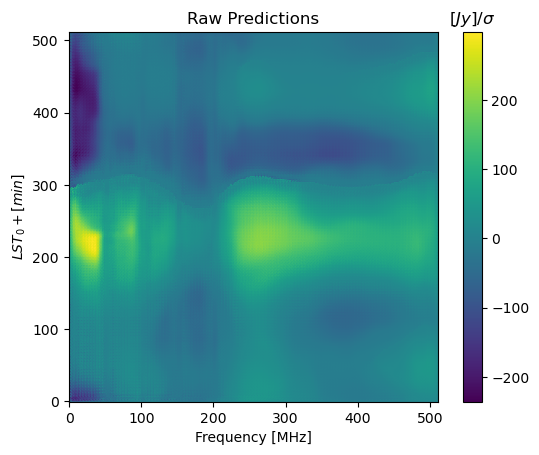

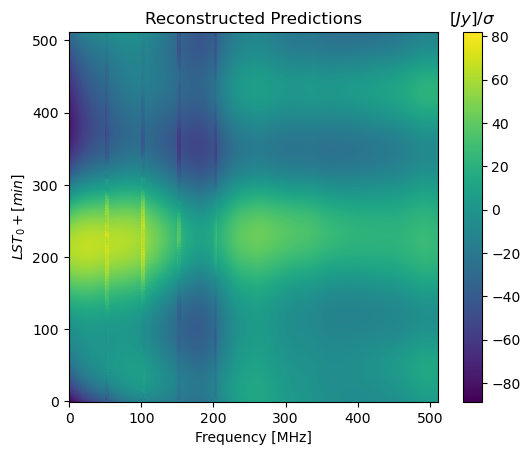

In [94]:
i = 0 # Showing first image of the model output on the 'test' data

prediction_plot(ground_truths[i,:,:,0], 'Ground Truth')

prediction_plot(masks[i,:,:], 'Masks')

prediction_plot(predictions[i,:,:,0], 'Raw Predictions') # What the model directly outputs

prediction_plot(reconstructed[i,:,:], 'Reconstructed Predictions')

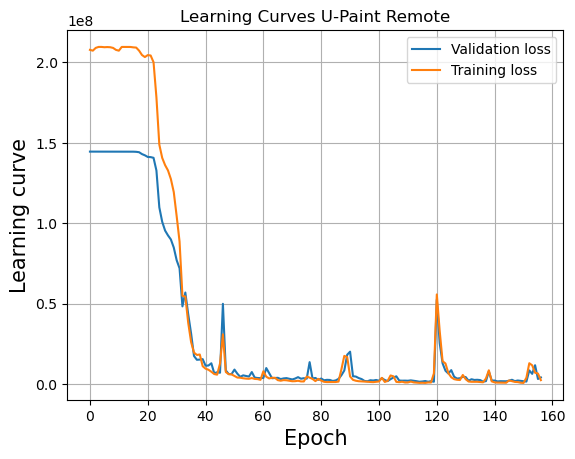

In [95]:
learning_plot('../logs/log_UPAINT2.csv', 'Learning Curves U-Paint Remote', start=0, end=0)

### Errors

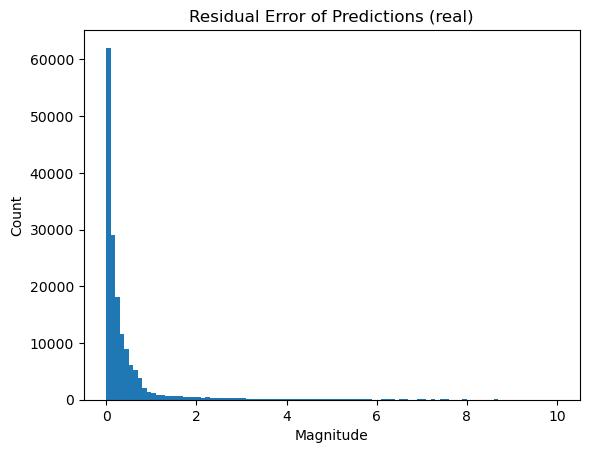

In [98]:
# Computing and plotting the residual errors over the masked regions
error_histogram(ground_truths[:,:,:,0], predictions[:,:,:,0], masks[:,:,:], error_type = 'RESIDUAL', title = 'Residual Error of Predictions (real)')

In [58]:
# Computing residual error over the full image
residual_error_full = np.true_divide((ground_truths[i,:,:,0]-reconstructed[i,:,:]),ground_truths[i,:,:,0])

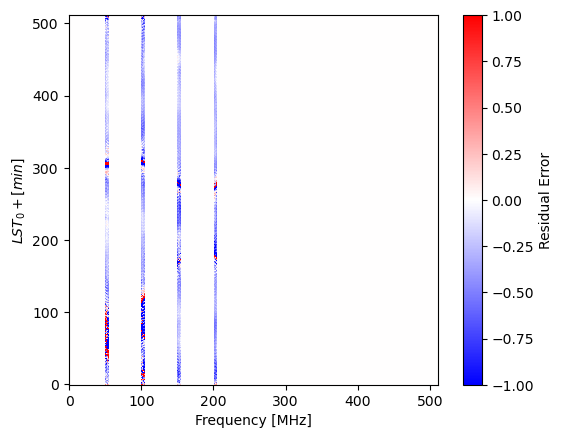

In [97]:
residual_plot(residual_error_full)